In [2]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# set up a browser-like header
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# macrotrends has multiple tables, the revenue table is usually the second
tables = pd.read_html(str(soup))

tesla_revenue = tables[1]
tesla_revenue.columns = ['Date', 'Revenue']

# Clean the revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# show last 5 rows
tesla_revenue.tail()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21924\3977600189.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


,Date,Revenue
59,2010-06-30,28.0
60,2010-03-31,21.0
61,2009-12-31,NaN
62,2009-09-30,46.0
63,2009-06-30,27.0


In [7]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Add user-agent header
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# extract tables
tables = pd.read_html(str(soup))

# usually the second table is the quarterly revenue
gme_revenue = tables[1]
gme_revenue.columns = ['Date', 'Revenue']

# Clean revenue
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Show last 5 rows
gme_revenue.tail()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_21924\2792801076.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


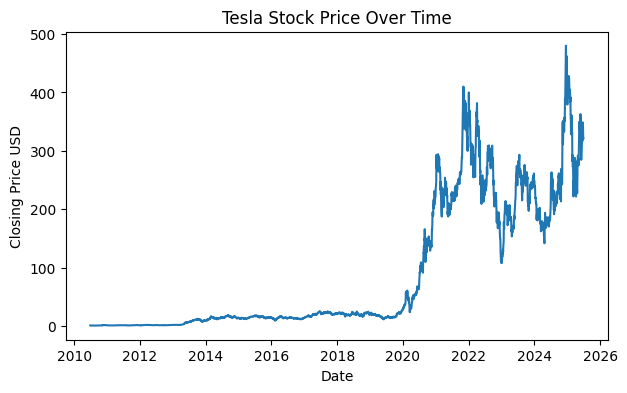

In [13]:
import matplotlib.pyplot as plt

def make_graph(stock_data, stock_name):
    plt.figure(figsize=(7,4))
    plt.plot(stock_data['Date'], stock_data['Close'])
    plt.title(f"{stock_name} Stock Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Closing Price USD")
    plt.show()

make_graph(tesla_data, 'Tesla')


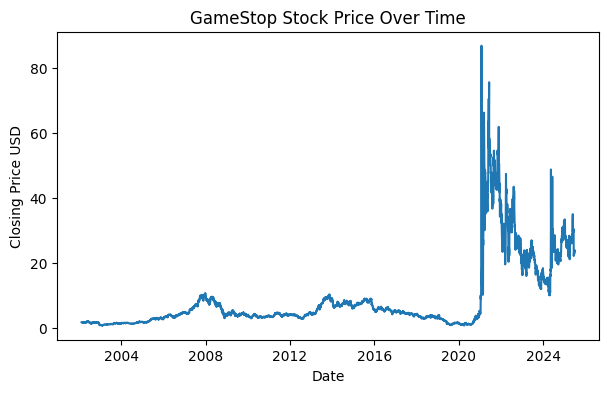

In [14]:
make_graph(gme_data, 'GameStop')